In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import gym

env = gym.make("Breakout-v0")
_ = env.reset()


/opt/conda/envs/xai/lib/python3.8/site-packages/ale_py/roms/__init__.py:94: DeprecationWarning: Automatic importing of atari-py roms won't be supported in future releases of ale-py. Please migrate over to using `ale-import-roms` OR an ALE-supported ROM package. To make this warning disappear you can run `ale-import-roms --import-from-pkg atari_py.atari_roms`.For more information see: https://github.com/mgbellemare/Arcade-Learning-Environment#rom-management
  _RESOLVED_ROMS = _resolve_roms()
A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn 
from torchvision import models
import torch 

In [4]:
for _ in range(1000):
    env.step(env.action_space.sample())  # take a random action
env.close()


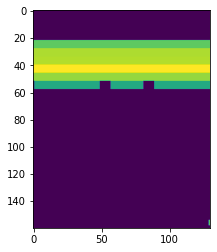

In [58]:

def img_crop(img_arr) :
    return img_arr[35:-15,15:-15,:]
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])[:,:,np.newaxis]
def totensor(img_arr) :
    return torch.FloatTensor(img_arr.transpose((2, 0, 1))).unsqueeze(dim=0)



img_arr = env.render(mode="rgb_array")
plt.imshow(rgb2gray(img_crop(img_arr)))

In [59]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(512, env.action_space.n)

In [60]:

def data_transform(x) :
    x = img_crop(x)
    # x = rgb2gray(x)
    # print(x.shape)
    x = totensor(x)
    return x

img_arr = env.render(mode="rgb_array")
model(data_transform(img_arr))
target2idx = {"0":0,"1":1,"2":2,"3":3}

(160, 130, 3)
torch.Size([1, 3, 160, 130])


In [61]:
from rlxai.xai import ImageXAI

In [62]:
data_transform(img_arr).shape

(160, 130, 3)
torch.Size([1, 3, 160, 130])


torch.Size([1, 3, 160, 130])

In [72]:
img_arr = env.render(mode="rgb_array")
model(data_transform(img_arr))

(160, 130, 3)
torch.Size([1, 3, 160, 130])


tensor([[0.3869, 0.4464, 0.0688, 0.1190]], grad_fn=<AddmmBackward>)

In [64]:
model(totensor(img_arr))

tensor([[ 0.1661,  0.9364, -1.2396,  0.3690]], grad_fn=<AddmmBackward>)

In [65]:
xai = ImageXAI(model ,  target2idx , data_transform)

In [76]:
xai(img_arr , "0")

run...
classify...
(160, 130, 3)
torch.Size([1, 3, 160, 130])
run for xai...
(160, 130, 3)
torch.Size([1, 3, 160, 130])
Approximation delta:  tensor([0.0634], dtype=torch.float64)


In [77]:
folder_dir = "./result"
from pathlib import Path
ResultDir = Path(folder_dir)
ResultDir.mkdir(exist_ok=True)

In [79]:
xai.showResult(save_path=ResultDir.joinpath("./Result.png"))

{0: '0', 1: '1', 2: '2', 3: '3'}
probability :  tensor([[0.2814, 0.2986, 0.2047, 0.2153]], grad_fn=<SoftmaxBackward>)


In [80]:
xai.showResult(save_path=ResultDir.joinpath("./Result.png"))
xai.show_integrated_gradients(save_folder=ResultDir)
xai.plot_Occlusion(save_path=ResultDir.joinpath("./Occlusion.png"))
xai.plot_InputXGradient(target=1, save_path=ResultDir.joinpath("./InputXGradeint.png"))
xai.plot_InputXGradient_all_target(save_path=ResultDir.joinpath("./InputXGradeint_ALL.png"))
xai.plot_GuidedBackprop_all_target(n_row=2, save_path=ResultDir.joinpath("./GuideBackprop.png"))
xai.show_encoded_img(save_path=ResultDir.joinpath("./EncodedImg.png"))
xai.plot_IntegratedGradients_Black(save_path=ResultDir.joinpath("./IntegratedGradients_Black.png"))
xai.plot_IntegratedGradients_NoiseTunnel(save_path=ResultDir.joinpath("./IntegratedGradients_NoiseTunnel.png"))
xai.plot_GradientShap(save_path=ResultDir.joinpath("./GradientShap.png"))
xai.plot_LRLIME(save_path=ResultDir.joinpath("./LRLIME.png"))

{0: '0', 1: '1', 2: '2', 3: '3'}
probability :  tensor([[0.2814, 0.2986, 0.2047, 0.2153]], grad_fn=<SoftmaxBackward>)
(160, 130, 3)
torch.Size([1, 3, 160, 130])
Predicted: 1  Probability: tensor([[0.2814, 0.2986, 0.2047, 0.2153]], grad_fn=<SoftmaxBackward>)
